<a href="https://colab.research.google.com/github/LerinaMM/analiseexploratoria_titanic/blob/main/Desafio_Titanic_Lerina_Mastruian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Titanic**

O desafio Titanic está disponível no site Kaggle (https://www.kaggle.com/c/titanic/overview) e teve como objetivo analisar os dados o naufrágio do RMS Titanic que ocorreu entre a noite de 14 de abril e a manhã de 15 de abril de 1912, no Atlântico Norte, quatro dias após o início de sua viagem inaugural, iniciada em Southampton, Inglaterra, com destino à cidade de Nova Iorque, nos Estados Unidos. O Titanic era o maior navio de passageiros em serviço à época, tinha 2208 pessoas a bordo quando atingiu um iceberg por volta de 23h40 (horário no navio)[a] no domingo, 14 de abril de 1912. O naufrágio aconteceu duas horas e quarenta minutos depois, às 02h20 (05h18 GMT) na segunda-feira, 15 de abril, resultando na morte de 1 496 pessoas, transformando-o em um dos desastres marítimos mais mortais. Fonte: Wikipedia.

Dessa forma, em posse do banco de dados, foram analisados dados sobre os sobreviventes e não sobreviventes desse naufragio, quais foram as classes de pessoas com maior chance de sobrevivência nesse acidente, se foram mulheres ou homens. 

Foi avaliado também se a premissa que sempre é dita sobre "salvar crianças e mulheres primeiro" se mostrou foi verdadeira para esse naufrágio.

Outros pontos que foram observados, sobre os sobreviventes e não sobreviventes do acidente sob os seguintes aspectos:
- em que classe os mesmos compram seus tickets, 
- qual era o principal destino desses passageiros. 
- Analise sobre tamanho de familia versus a chance de sobrevivência, se passageiros com familia maior tiveram mais chances de sobreviver que passageiros que tem familias menores ou até mesmo passageiros que estavam sozinhos no navio.

**Conteúdo dos dados**

Foi utilizado o dataset do titanic disponivel na plataforma do kaggle
https://www.kaggle.com/c/titanic/overview

Segue abaixo a explicação de cada coluna desse Dataset:

*   **Passengerird:** Identificador único para cada passageiro;
*   **Survived:** Indica se o passageiro sobreviveu, onde (0-Não; 1-Sim)
*   **Pclass:** Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3- Terceira Classe;
*   **Name:** Nome do passageiro;
*   **Sex:** Sexo do passageiro;
*   **Age:** Idade do passageiro;
*   **SibSp:** Número de irmãos - esposas a bordo;
*   **Parch:** Numero de pais-filhos a  bordo;
*   **Ticket:** Número da passagem;
*   **Fare:** Preço da passagem;
*   **Cabin:** Cabine;
*   **Embarked:** Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", font_scale=1.75)

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [ ]:
# Podemos visualizar as primeiras linhas do DataFrame (DF) com o metodo head()
# Entre parenteses você coloca quantas linhas você quer ler do Dataset

#Com essa ferramenta podemos visualizar as 10 primeiras linhas do Dataset
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Com a ferramenta train_df.tail(10) você consegue visualizar as ultimas linhas dos dados, voce coloca entre os parenteses quantas linhas voce quer ler dos ultimos dados

train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
# Esse comando conseguimos visualizar o Dataset através de amostras aleatórias, podes colocar entre parenteses quantos dados você quer ler

train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q


In [ ]:
#Trará os dados com uma apresentação diferente
#Dtype na terceira coluna informa qual é o tipo de dado

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Traz o nome das colunas na ordem
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# O método shape mostra o tamanho dos nossos dados (dimensões dos eixos)

train_df.shape

(891, 12)

In [ ]:
# Se o dataset se tem algum dado duplicado

train_df.duplicated().sum()

0

In [ ]:
# Estatísticas resumidas

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusão:** No quadro acima podemos perceber que cerca de 38% do conjunto de treino sobreviveram ao desastre do Titanic e que as idades dos passageiros neste conjunto varia de 0.42 a 80 anos

> **Vamos analisar se temos dados faltantes nas colunas dos conjuntos de dados**

In [ ]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Analisando os dados faltantes mostra que a coluna cabine faltam 687 dados e sobre a idade dos passageiros faltam 177 dados. Na coluna de embarque duas linhas de informações. 

> **Vamos analisar agora o banco de dados das 10 primeiras linhas para verificar se temos alguma inconsistência.**

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Conclusão:** Analisando os dados, algumas coisas chamam atenção. Uma delas é que existem muitos dados que precisam ser convertidos para numericos (isso para podermos usar esses dados nos algoritmos de ML), como por exemplo o Sexo dos passageiros e a cidade de onde embarcaram. Tambem existem valores que estão em escalas muito diferentes (precisamos converter para uma escalar mais aproximada, normalizar). Além disso, percebemos colunas que contem vários 'NaN' (Not a Number)

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As colunas com valores nulos são: Age, Cabin e Embarked;

Essa tabela indica que na coluna cabine existem 687 dados faltantes e na Idade faltaria os dados de idade de 177 pessoas

De todos esses dados, apenas 342 sobreviveram, vamos tentar entender se alguns fatores influenciaram a taxa de sobrevivência.

Vamos verificar quais as informações estão presentes em cada coluna

> Vamos verificar a porcentagem de valores em Branco em cada coluna

In [ ]:
(train_df.isnull().sum() / len(train_df)) * 100.0


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.277840
Embarked        0.000000
dtype: float64

Podemos verificar a partir dessa análise, o banco de dados mostra que 77% dos passageiros não aparece a informação em que cabine os mesmos estariam localizados, vamos dessa forma, descartar essa coluna

In [ ]:
train_df.drop('Cabin', axis='columns', inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


> Realizando o descarte dos poucos passageiros da linha "Embarked"

In [ ]:
train_df.dropna(subset=['Embarked'], inplace=True)
(train_df.isnull().sum() / len(train_df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

Foram removidos os passageiros da linha "Embarked"

# **> Início da análise exploratória**

> **Vamos ver como o fator sexo influenciou na sobrevivência do passageiro**

### **> Elaborando Histograma para mostrar a faixa de idade dos passageiros**

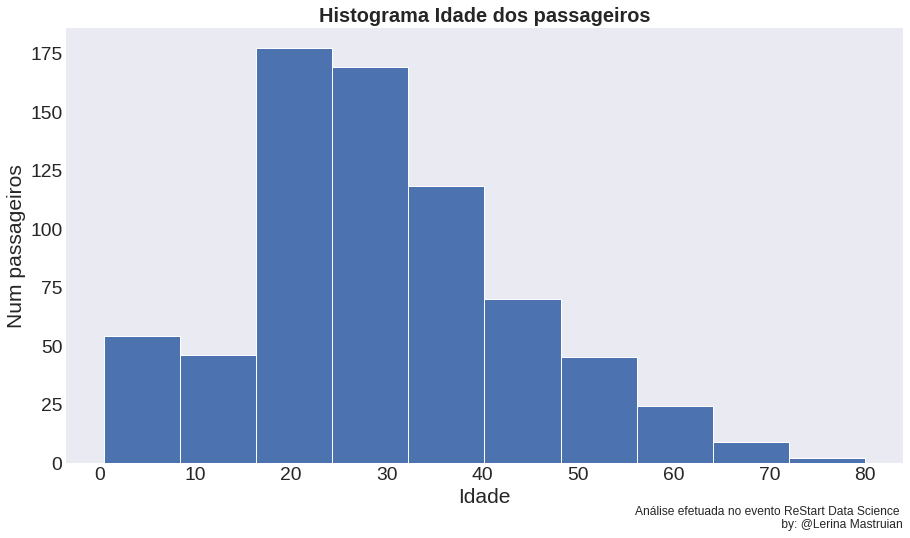

In [27]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

#Titulo do grafico
plt.title('Histograma Idade dos passageiros', fontsize=20, fontweight='bold')

plt.hist(train_df.Age)
plt.xlabel('Idade')
plt.ylabel('Num passageiros')

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
);

#Mostrar o histograma
plt.show()


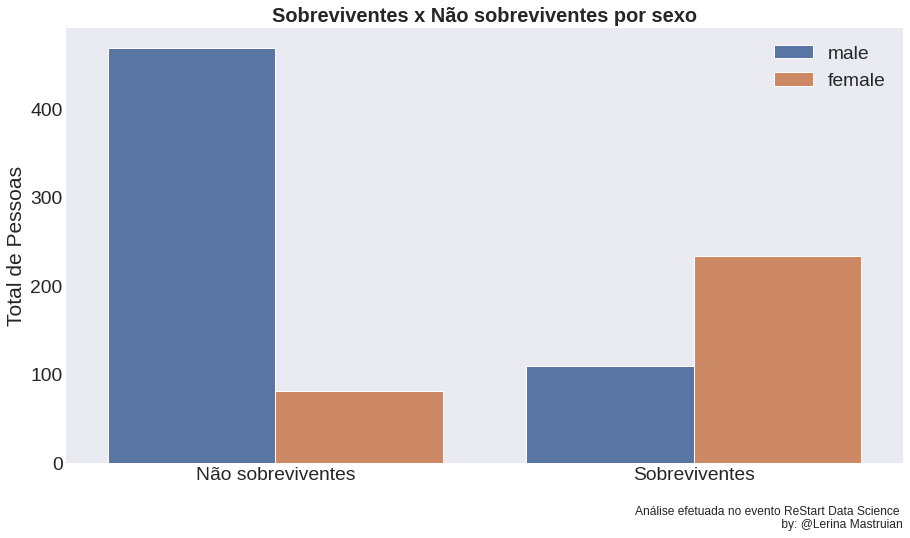

In [2]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

g = sns.countplot(train_df['Survived'], hue = train_df['Sex'])
plt.legend(loc='upper right')
g.set(ylabel="Total de Pessoas", xlabel="", xticklabels=["Não sobreviventes", "Sobreviventes"])
plt.title('Sobreviventes x Não sobreviventes por sexo', fontsize=20, fontweight='bold')

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
);

Podemos notar que no grupo dos homens estão no grupo dos "não sobreviventes" é muito maior que as mulheres. Então começamos a verificar a teoria que "primeiro salvar as mulheres e crianças começa a fazer sentido". Mas precisamos realizar outras análises para que possamos verificar se essa teoria se confirma.

<Figure size 1296x720 with 0 Axes>

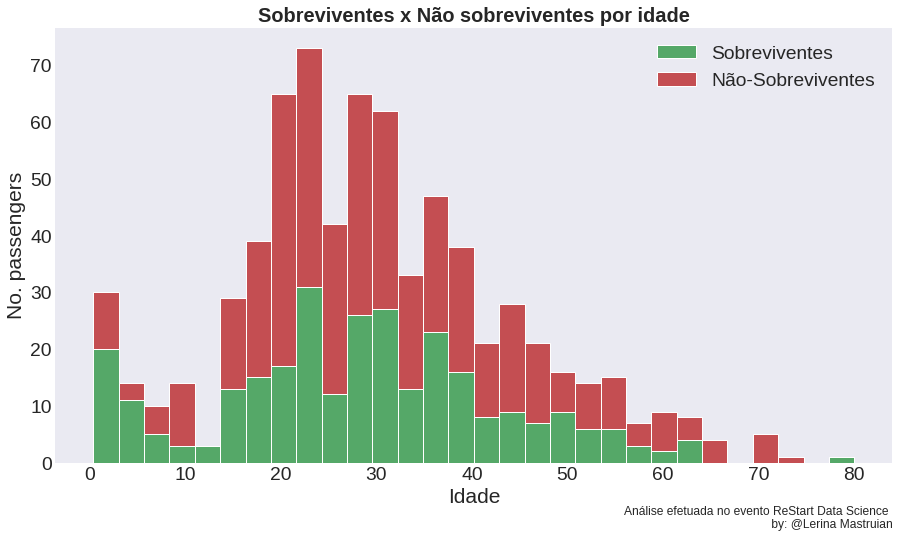

In [19]:
#Plotando grafico por idade

# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

figure = plt.figure(figsize=(15,8))
plt.hist([train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']], 
         stacked=True, color=['g','r'],
         bins=30, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passengers')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend();

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
);

O que podemos concluir analisando mortos x sobrevivientes, que tivemos mais homens que nao sobreviveram ao naufrágio que as mulheres.

### **> Histograma das variáveis numéricas**

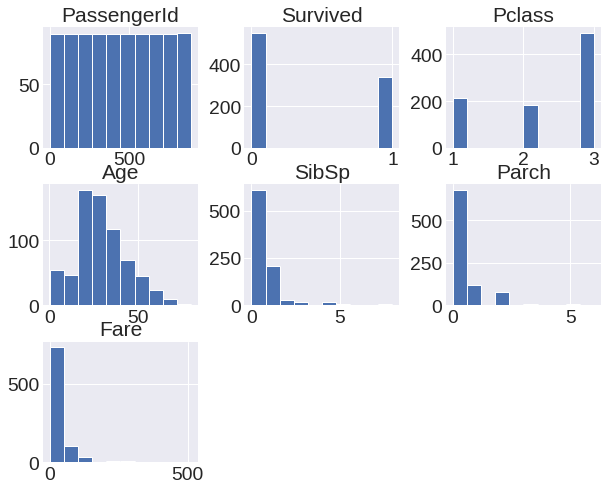

In [45]:
train_df.hist(figsize=(10,8));

## Verificação dos grupos que tiveram mais chance de sobrevivência

<Figure size 1080x576 with 0 Axes>

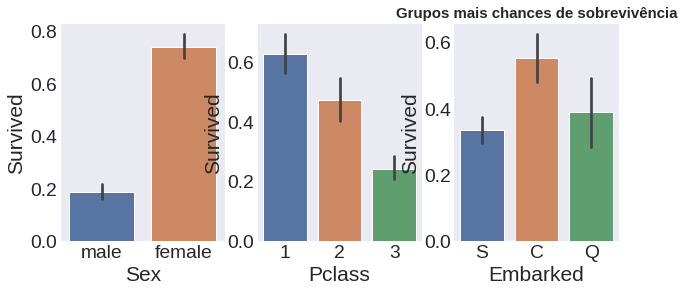

In [34]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(10,4))

plt.title('Grupos mais chances de sobrevivência', fontsize=15, fontweight='bold')

sns.barplot(x='Sex', y= 'Survived', data=train_df, ax=axis1)
sns.barplot(x='Pclass', y= 'Survived', data=train_df, ax=axis2)
sns.barplot(x='Embarked', y= 'Survived', data=train_df, ax=axis3);

Pelo gráfico acima já conseguimos confirmar duas suposições iniciais:

- As mulheres tiveram muito mais chances de sobreviver que os homens (75% vs. 18%)

- Os passageiros que embarcaram na primeira classe tiveram mais de 60% de chance de sobreviver versus a terceira classe que teve um pouco mais de 20% de sobreviver.

- Os passageiros que embarcaram na cidade de Cherbourg tiveram 60% de chance de sobreviver, enquanto quem embarcou em Queenstown teve 40% de chances de sobreviver e quem embarcou em Southampton tiveram somente 20% de sobreviver.

### > **Distribuição das idades dos Sobreviventes x Mortos**

<Figure size 1080x576 with 0 Axes>

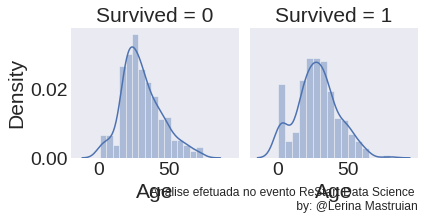

In [46]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.distplot, 'Age')

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.4), xycoords='axes fraction', ha='right', fontsize=12
);

Quando analisamos a distribuição das idades dos sobreviventes e mortos, podemos verificar que temos um pico no lado dos sobreviventes para crianças pequenas. O comportamento dos dois gráficos é bem parecido, mas esse detalhe é bem importante pois confirma a hipótese que crianças também tem maior chance de sobreviverem, conforme relata a hipótese: “Mulheres e Crianças são resgatadas primeiro”.

## Elaboração de um histograma para cada atributo:

<Figure size 1080x576 with 0 Axes>

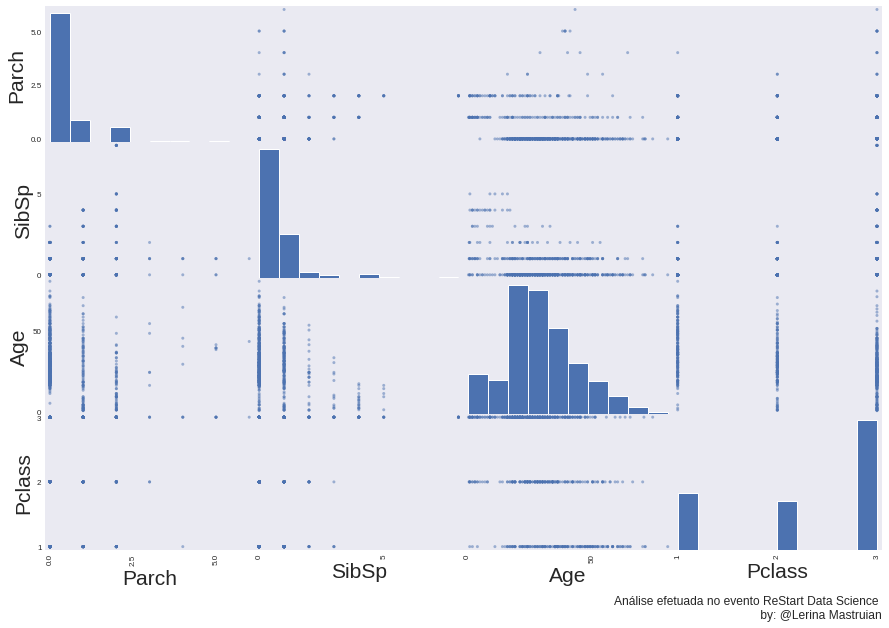

In [42]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

columns=['Parch','SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train_df[columns], figsize=(15,10));

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.50), xycoords='axes fraction', ha='right', fontsize=12
);

Exibir um histograma de cada atributo, conseguimos verificar que, por exemplo, as pessoas mais velhas estão mais concentradas na 1ª Classe e pessoas mais jovens na 3ª classe.

# > Correlação entre as variáveis: Idade, Custo do Ticket e Sobreviventes

<Figure size 1080x576 with 0 Axes>

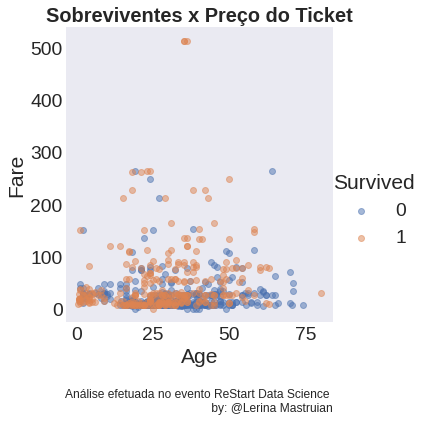

In [5]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_df, fit_reg=False, scatter_kws={'alpha':0.5})
plt.title('Sobreviventes x Preço do Ticket', fontsize=20, fontweight='bold')

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
);


Podemos notar nessa análise que os sobreviventes pagaram preços mais baixos de ticket e outro ponto importante, os passageiros poderiam ser mais jovens que os demais passageiros.

# Análises de sobreviventes e não sobreviventes por gênero

Text(0.5, 1.0, 'Sobreviventes x Preço do Ticket')

<Figure size 1080x576 with 0 Axes>

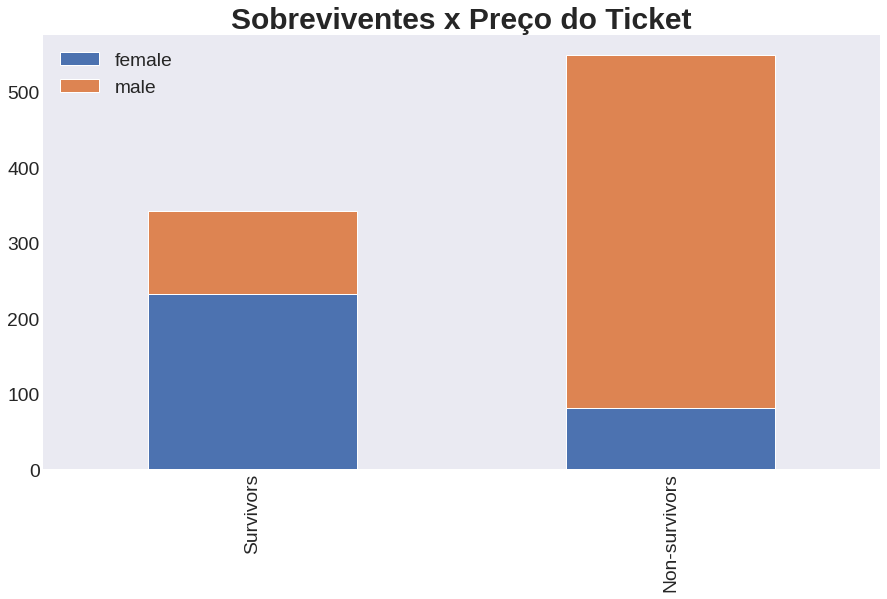

In [6]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

survived_sex = train_df[train_df['Survived']==1]['Sex'].value_counts()
dead_sex = train_df[train_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survivors','Non-survivors']
df.plot(kind='bar',stacked=True, figsize=(15,8));
plt.title('Sobreviventes x Preço do Ticket', fontsize=30, fontweight='bold')

## > **Análise entre sobreviventes e não sobreviventes sob o item "Preço do Ticket"**

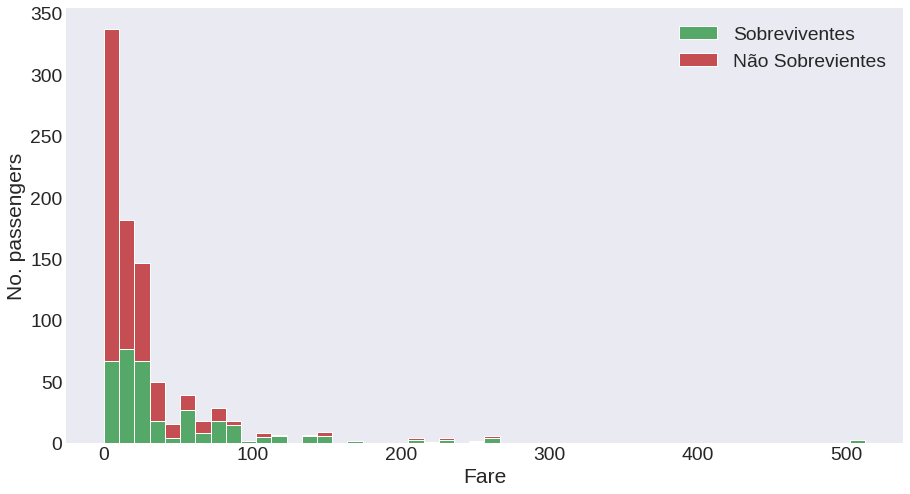

In [7]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color=['g','r'],
         bins=50, label=['Sobreviventes','Não Sobrevientes'])
plt.xlabel('Fare')
plt.ylabel('No. passengers')
plt.legend();

Os gráfico acima indica que o maior número de passageiros que sobreviveram pagaram um preço de passagem entre $0 a $100 doláres. Sendo que os maiores volumes poderiamos destacar que foram entre $0 a $30 doláres

## > **Analise verificando a chance de sobrevivência sob o contexto de tamanho de família**

A idéia para realizar essa análise e verificar se o tamanho da família influenciou para a sobrevivência dos passageiros

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1080x576 with 0 Axes>

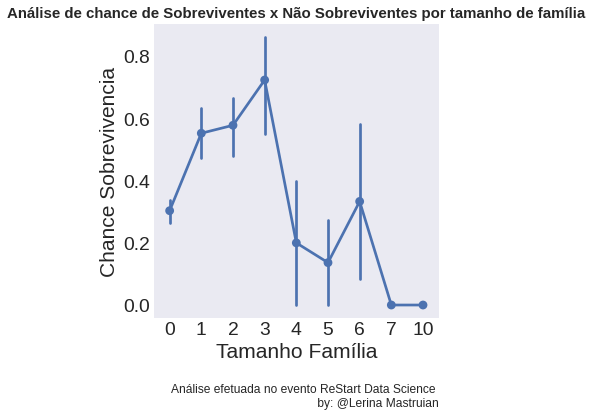

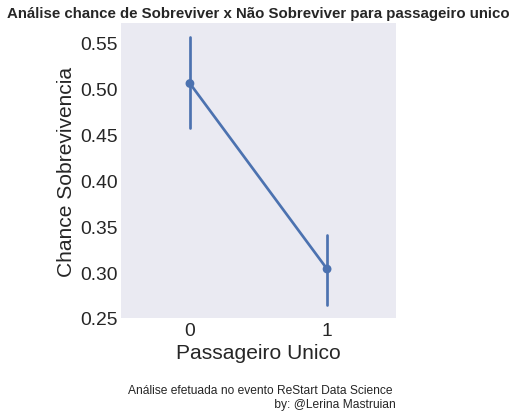

In [10]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

# Adicionando a coluna "Family_Size"
train_df['Family_Size'] = 0
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp']
 
# Adicionando a coluna "Alone"
train_df['Alone'] = 0
train_df.loc[train_df.Family_Size == 0, 'Alone'] = 1

# Plotando em formato Factorplot para "Family_Size"
sns.factorplot(x ='Family_Size', y ='Survived', data = train_df)
plt.title('Análise de chance de Sobreviventes x Não Sobreviventes por tamanho de família', fontsize=15, fontweight='bold')
plt.xlabel('Tamanho Família')
plt.ylabel('Chance Sobrevivencia')
plt.legend()

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
);

 
# Plotando em formato Factorplot para "Alone"
sns.factorplot(x ='Alone', y ='Survived', data = train_df)
plt.title('Análise chance de Sobreviver x Não Sobreviver para passageiro unico', fontsize=15, fontweight='bold')
plt.xlabel('Passageiro Unico')
plt.ylabel('Chance Sobrevivencia')
plt.legend()

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
);



O termo "Family_Size" mostra o número de pessoas na família de um passageiro. 

A coluna "Alone" foi adicionada para verificar as chances de sobrevivência de um passageiro solitário em comparação com um passageiro que possui família.

Dessa forma podemos concluir que:

- Se um passageiro estiver sozinho, a taxa de sobrevivência é menor.

- Se o tamanho da família for maior que 5, as chances de sobrevivência diminuem consideravelmente.

- As familias que tiveram 3 pessoas tiveram quase 80% de sobreviver.

## Graficos de contagem de passageiros mostrando os locais de embarque separando por classe

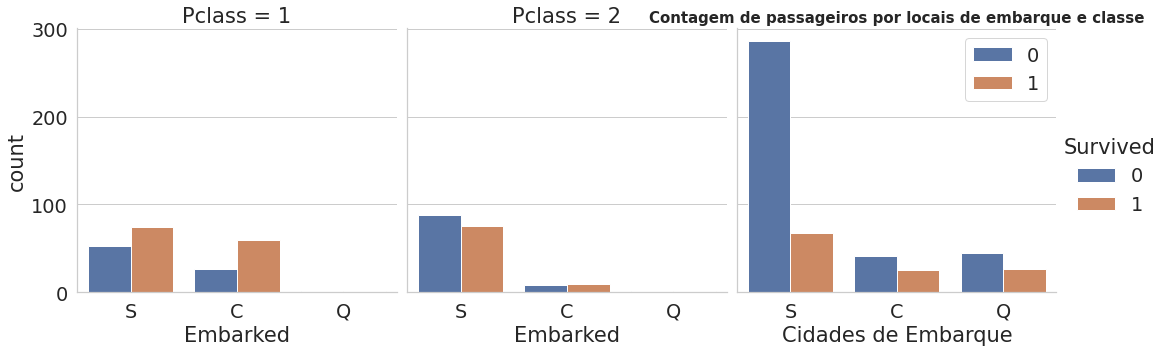

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train_df)

plt.title('Contagem de passageiros por locais de embarque e classe', fontsize=15, fontweight='bold')
plt.xlabel('Cidades de Embarque')
plt.ylabel('Numero de passageiros')
plt.legend()

A maioria dos passageiros embarcou em S. 

Assim, os valores em falta pode ser preenchido com S.

Maioria da terceira classe embarcaram a partir Q .

A cidade S parece que ajudou os passageiros das primeira e segunda classes a sobreviver em comparação com a terceira classe.